In [220]:
%matplotlib  inline
import  pandas as pd
import  numpy as np
import  matplotlib.pyplot as plt
import  seaborn as sns
import  warnings
warnings.filterwarnings("ignore")

train=pd.read_csv("C:\\Users\\23160\\Desktop\\train.csv")
test=pd.read_csv("C:\\Users\\23160\\Desktop\\test.csv")
PassengerId=test['PassengerId']
all_data=pd.concat([train,test],ignore_index=True)
print(all_data.info())
print(all_data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB
None
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [221]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [222]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [223]:

train['Survived'].value_counts()


Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

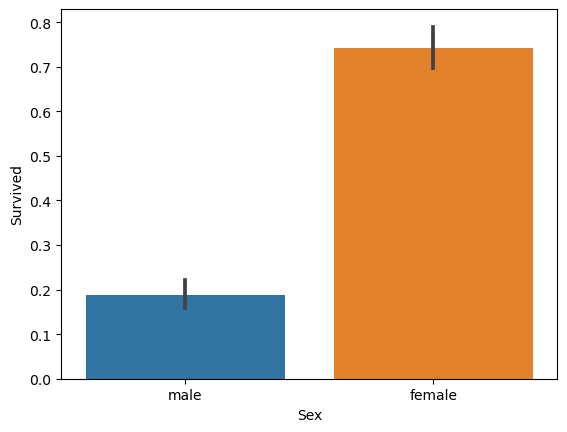

In [224]:
sns.barplot(x="Sex",y="Survived",data=train)

<Axes: xlabel='Pclass', ylabel='Survived'>

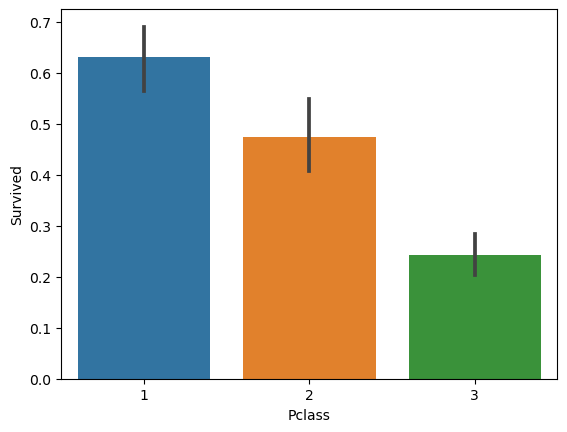

In [225]:
sns.barplot(x="Pclass",y="Survived",data=train)

<Axes: xlabel='SibSp', ylabel='Survived'>

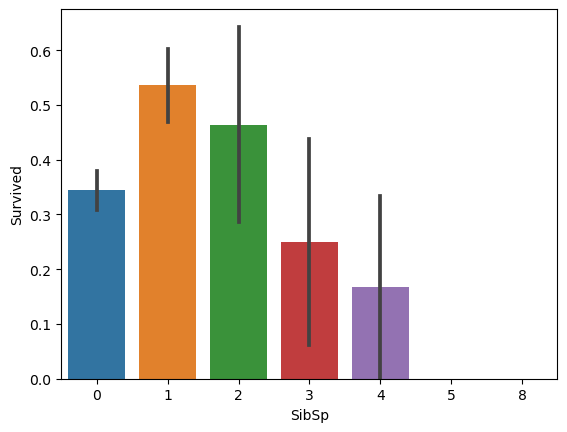

In [226]:
sns.barplot(x="SibSp",y="Survived",data=train)

<Axes: xlabel='Parch', ylabel='Survived'>

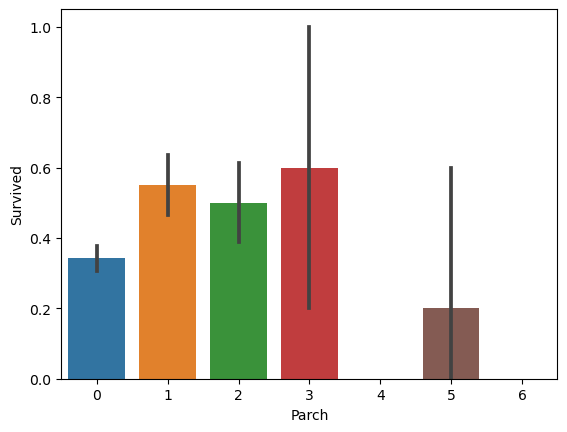

In [227]:
sns.barplot(x="Parch",y="Survived",data=train)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


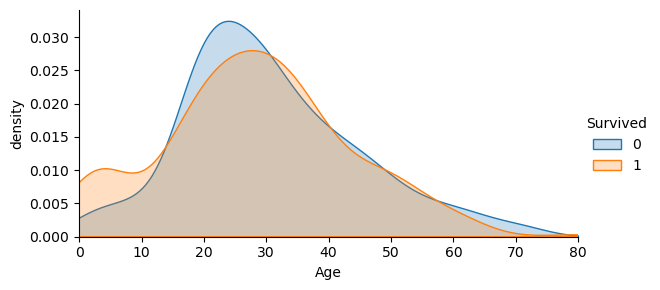

In [228]:
facet=sns.FacetGrid(train,hue="Survived",aspect=2)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.xlabel('Age')
plt.ylabel('density')
print(all_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


<Axes: xlabel='Embarked', ylabel='count'>

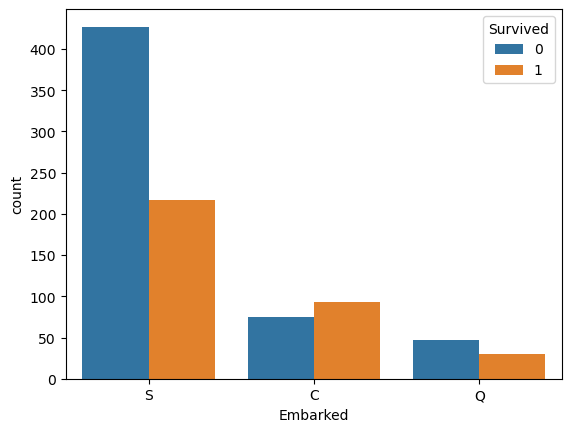

In [229]:
print(all_data.columns)
sns.countplot(x='Embarked',hue='Survived',data=train)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')


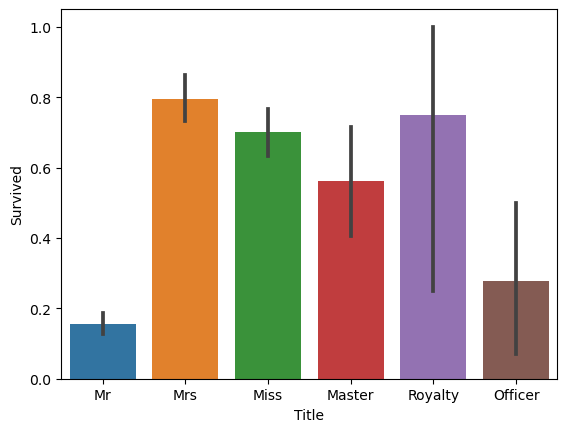

In [230]:

all_data['Title']=all_data['Name'].apply(lambda  x:x.split(',')[1].split('.')[0].strip())
Title_Dict={}
Title_Dict.update(dict.fromkeys(['Capt','Col','Major','Dr','Rev'],'Officer'))
Title_Dict.update(dict.fromkeys(['Don','Sir','the Countess','Done','Lady'],'Royalty'))
Title_Dict.update(dict.fromkeys(['Mme','Ms','Mrs'],'Mrs'))
Title_Dict.update(dict.fromkeys(['Mme','Ms','Mrs'],'Mrs'))
Title_Dict.update(dict.fromkeys(['Mlle','Miss'],'Miss'))
Title_Dict.update(dict.fromkeys(['Mr'],'Mr'))
Title_Dict.update(dict.fromkeys(['Master','Jonkheer'],'Master'))
all_data['Title']=all_data['Title'].map(Title_Dict)
sns.barplot(x='Title',y='Survived',data=all_data)
print(all_data.columns)

<Axes: xlabel='FamilySize', ylabel='Survived'>

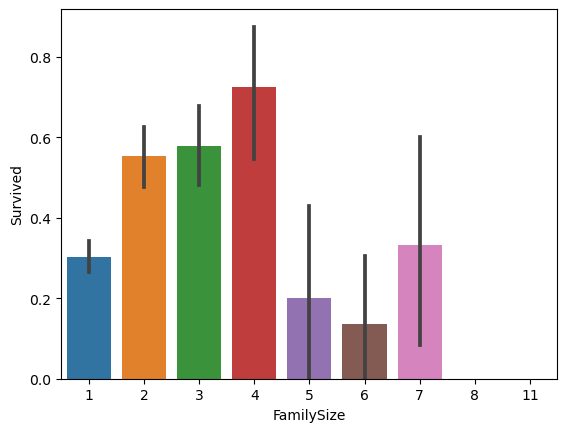

In [231]:
all_data['FamilySize']=all_data['SibSp']+all_data['Parch']+1
sns.barplot(x="FamilySize",y="Survived",data=all_data)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'FamilySize',
       'FamilyLabel'],
      dtype='object')


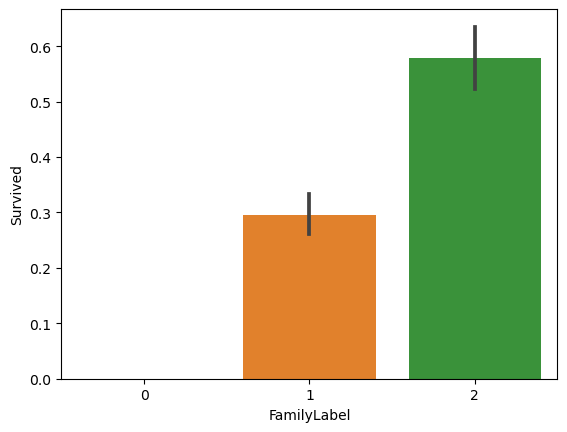

In [232]:
def Fam_label(s):
    if (s >= 2) & (s <= 4):
        return 2
    elif ((s > 4) & (s <= 7)) | (s == 1):
        return 1
    elif (s > 7):
        return 0
all_data['FamilyLabel']=all_data['FamilySize'].apply(Fam_label)
sns.barplot(x="FamilyLabel", y="Survived", data=all_data)

print(all_data.columns)

In [233]:
print(all_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'FamilySize',
       'FamilyLabel'],
      dtype='object')


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'FamilySize',
       'FamilyLabel'],
      dtype='object')
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'FamilySize',
       'FamilyLabel', 'Deck'],
      dtype='object')


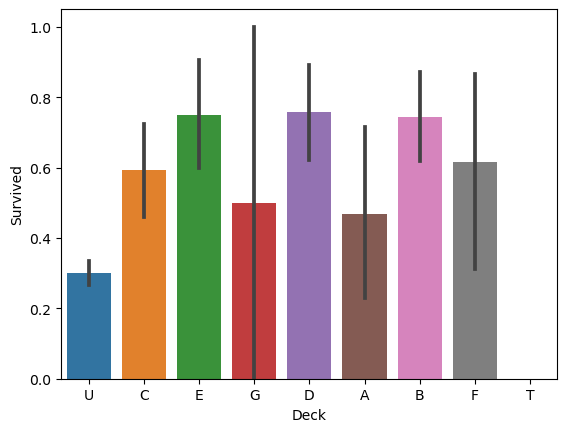

In [234]:
print(all_data.columns)
all_data['Cabin'] = all_data['Cabin'].fillna('Unknown')
all_data['Deck']=all_data['Cabin'].str.get(0)
sns.barplot(x="Deck", y="Survived", data=all_data)

print(all_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'FamilySize',
       'FamilyLabel', 'Deck'],
      dtype='object')


<Axes: xlabel='TicketGroup', ylabel='Survived'>

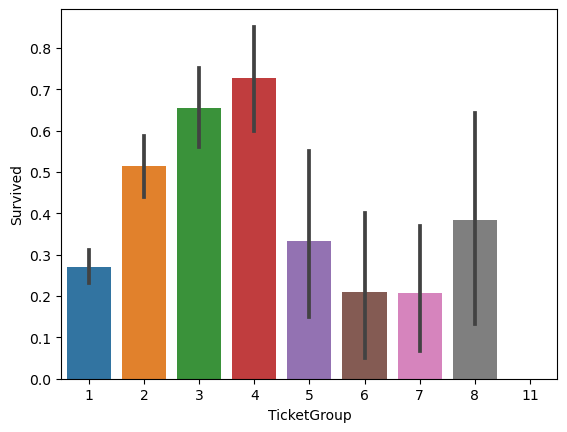

In [235]:
print(all_data.columns)
Ticket_Count=dict(all_data['Ticket'].value_counts())
all_data['TicketGroup']=all_data['Ticket'].apply(lambda  x:Ticket_Count[x])
sns.barplot(x='TicketGroup',y="Survived",data=all_data)



Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'FamilySize',
       'FamilyLabel', 'Deck', 'TicketGroup'],
      dtype='object')


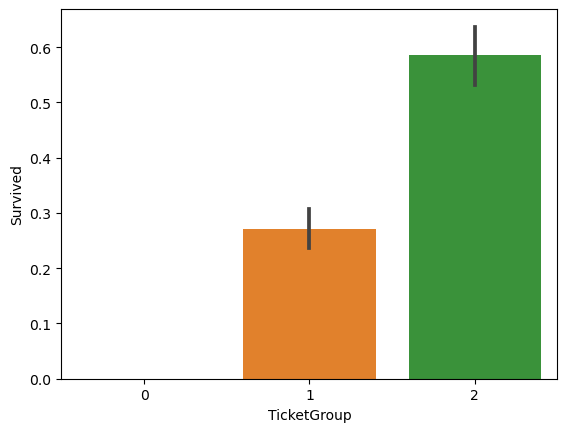

In [236]:
def Ticket_Label(s):
    if (s >= 2) & (s <= 4):
        return 2
    elif ((s > 4) & (s <= 8)) | (s == 1):
        return 1
    elif (s > 8):
        return 0

all_data['TicketGroup'] = all_data['TicketGroup'].apply(Ticket_Label)
sns.barplot(x='TicketGroup', y='Survived', data=all_data)

print(all_data.columns)

In [237]:
print(all_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'FamilySize',
       'FamilyLabel', 'Deck', 'TicketGroup'],
      dtype='object')


In [238]:
from sklearn.ensemble import RandomForestRegressor
print(all_data.columns)
age_df = all_data[['Age', 'Pclass','Sex','Title']]
age_df=pd.get_dummies(age_df)
known_age = age_df[age_df.Age.notnull()].values
unknown_age = age_df[age_df.Age.isnull()].values
y = known_age[:, 0]
X = known_age[:, 1:]
rfr = RandomForestRegressor(random_state=0, n_estimators=100, n_jobs=-1)
rfr.fit(X, y)
predictedAges = rfr.predict(unknown_age[:, 1::])
all_data.loc[ (all_data.Age.isnull()), 'Age' ] = predictedAges 


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'FamilySize',
       'FamilyLabel', 'Deck', 'TicketGroup'],
      dtype='object')


In [239]:
all_data[all_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,FamilyLabel,Deck,TicketGroup
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss,1,1,B,2
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs,1,1,B,2


In [240]:
all_data.groupby(by=["Pclass","Embarked"]).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [241]:
all_data['Embarked'] = all_data['Embarked'].fillna('C')


In [242]:
all_data[all_data['Fare'].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,FamilyLabel,Deck,TicketGroup
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,Unknown,S,Mr,1,1,U,1


In [243]:
fare=all_data[(all_data['Embarked'] == "S") & (all_data['Pclass'] == 3)].Fare.median()
all_data['Fare']=all_data['Fare'].fillna(fare)


In [244]:
all_data['Surname']=all_data['Name'].apply(lambda x:x.split(',')[0].strip())
Surname_Count = dict(all_data['Surname'].value_counts())
all_data['FamilyGroup'] = all_data['Surname'].apply(lambda x:Surname_Count[x])
Female_Child_Group=all_data.loc[(all_data['FamilyGroup']>=2) & ((all_data['Age']<=12) | (all_data['Sex']=='female'))]
Male_Adult_Group=all_data.loc[(all_data['FamilyGroup']>=2) & (all_data['Age']>12) & (all_data['Sex']=='male')]


In [245]:
Female_Child=pd.DataFrame(Female_Child_Group.groupby('Surname')['Survived'].mean().value_counts())
Female_Child.columns=['GroupCount']
Female_Child


,GroupCount
Survived,
1.000000,115
0.000000,31
0.750000,2
0.333333,1
0.142857,1


Text(0.5, 0, 'AverageSurvived')

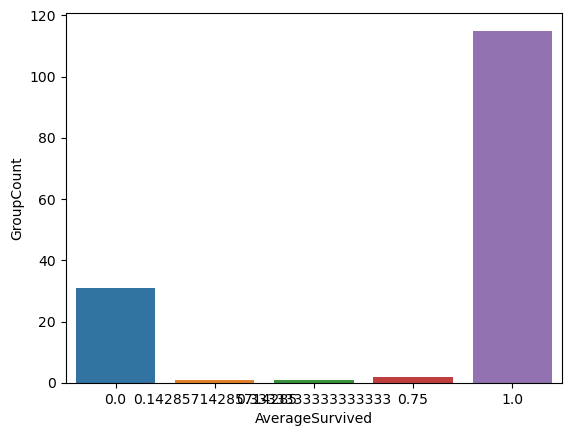

In [246]:
sns.barplot(x=Female_Child.index, y=Female_Child["GroupCount"]).set_xlabel('AverageSurvived')


In [247]:
Male_Adult=pd.DataFrame(Male_Adult_Group.groupby('Surname')['Survived'].mean().value_counts())
Male_Adult.columns=['GroupCount']
Male_Adult


,GroupCount
Survived,
0.000000,122
1.000000,20
0.500000,6
0.333333,2
0.250000,1


In [248]:
Female_Child_Group=Female_Child_Group.groupby('Surname')['Survived'].mean()
Dead_List=set(Female_Child_Group[Female_Child_Group.apply(lambda x:x==0)].index)
print(Dead_List)
Male_Adult_List=Male_Adult_Group.groupby('Surname')['Survived'].mean()
Survived_List=set(Male_Adult_List[Male_Adult_List.apply(lambda x:x==1)].index)
print(Survived_List)

{'Van Impe', 'Rosblom', 'Robins', 'Ford', 'Oreskovic', 'Danbom', 'Goodwin', 'Lefebre', 'Arnold-Franchi', 'Canavan', 'Olsson', 'Cacic', 'Turpin', 'Rice', 'Barbara', 'Vander Planke', 'Zabour', 'Boulos', 'Lobb', 'Palsson', 'Attalah', 'Panula', 'Strom', 'Johnston', 'Skoog', 'Ilmakangas', 'Bourke', 'Caram', 'Jussila', 'Lahtinen', 'Sage'}
{'Bradley', 'Goldenberg', 'Chambers', 'Frolicher-Stehli', 'Jonsson', 'Taylor', 'Duff Gordon', 'McCoy', 'Nakid', 'Daly', 'Greenfield', 'Dick', 'Kimball', 'Cardeza', 'Harder', 'Frauenthal', 'Beckwith', 'Bishop', 'Beane', 'Jussila'}


In [249]:
train=all_data.loc[all_data['Survived'].notnull()]
test=all_data.loc[all_data['Survived'].isnull()]
test.loc[(test['Surname'].apply(lambda x:x in Dead_List)),'Sex'] = 'male'
test.loc[(test['Surname'].apply(lambda x:x in Dead_List)),'Age'] = 60
test.loc[(test['Surname'].apply(lambda x:x in Dead_List)),'Title'] = 'Mr'
test.loc[(test['Surname'].apply(lambda x:x in Survived_List)),'Sex'] = 'female'
test.loc[(test['Surname'].apply(lambda x:x in Survived_List)),'Age'] = 5
test.loc[(test['Surname'].apply(lambda x:x in Survived_List)),'Title'] = 'Miss'


In [250]:
all_data=pd.concat([train, test])

all_data=all_data[['Survived','Pclass','Sex','Age','Fare','Embarked','Title','FamilyLabel','Deck','TicketGroup']]
all_data=pd.get_dummies(all_data)
train=all_data[all_data['Survived'].notnull()]
test=all_data[all_data['Survived'].isnull()].drop('Survived',axis=1)
X = train.values[:,1:]
y = train.values[:,0]


In [252]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif

# Assuming you have already defined X and y

# Convert y to integer type
y = y.astype(int)

# Create pipeline
pipe = Pipeline([
    ('select', SelectKBest(k=20, score_func=f_classif)),
    ('classify', RandomForestClassifier(random_state=10, max_features='sqrt'))
])

# Define parameter grid for GridSearchCV
param_test = {
    'classify__n_estimators': list(range(20, 50, 2)),
    'classify__max_depth': list(range(3, 60, 3))
}

# Create GridSearchCV object
gsearch = GridSearchCV(estimator=pipe, param_grid=param_test, scoring='roc_auc', cv=10)

# Fit the model
gsearch.fit(X, y)

# Print best parameters and best score
print(gsearch.best_params_, gsearch.best_score_)


{'classify__max_depth': 6, 'classify__n_estimators': 48} 0.8793119995472937


In [253]:
from sklearn.pipeline import make_pipeline
select = SelectKBest(k = 20)
clf = RandomForestClassifier(random_state = 10, warm_start = True, 
                                  n_estimators = 26,
                                  max_depth = 6, 
                                  max_features = 'sqrt')
pipeline = make_pipeline(select, clf)
pipeline.fit(X, y)

Pipeline(steps=[('selectkbest', SelectKBest(k=20)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=6, n_estimators=26,
                                        random_state=10, warm_start=True))])

In [255]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest

# 假设您已经定义了 X 和 y

# 创建 pipeline
select = SelectKBest(k=20)
clf = RandomForestClassifier(random_state=10, max_features='sqrt')
pipeline = make_pipeline(select, clf)

# 计算交叉验证分数
cv_score = cross_val_score(pipeline, X, y, cv=10)

# 打印交叉验证分数的平均值和标准差
print("CV Score: Mean - %.7g | Std - %.7g" % (np.mean(cv_score), np.std(cv_score)))


CV Score: Mean - 0.8204869 | Std - 0.04573954


In [260]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest

# 假设您已经定义了 X_train, y_train, X_test

# 创建 pipeline
select = SelectKBest(k=20)
clf = RandomForestClassifier(random_state=10, max_features='sqrt')
pipeline = make_pipeline(select, clf)

# 拟合整个 pipeline
pipeline.fit(X, y)

# 进行预测
predictions = pipeline.predict(test)

# 生成 submission DataFrame
submission = pd.DataFrame({"PassengerId": PassengerId, "Survived": predictions.astype(np.int32)})

# 将结果保存为 CSV 文件
submission.to_csv("C:\\Users\\23160\\Desktop\\result.csv", index=False)
